<a href="https://colab.research.google.com/github/beatrizmilitelo/analises-e-visualizacao-de-dados/blob/main/Projeto_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv("dados.csv")

### Visualize o conteúdo do DataFrame

In [4]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [17]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [23]:
intervalos_classes_renda = {
    'E': (0, 2 * 788),
    'D': (2 * 788, 5 * 788),
    'C': (5 * 788, 15 * 788),
    'B': (15 * 788, 25 * 788),
    'A': (25 * 788, 200000)  # 'inf' representa infinito para valores acima de 25 SM
}

# Mostrando os intervalos das classes de renda em reais
for classe, intervalo in intervalos_classes_renda.items():
    print(f'Classe {classe}: R${intervalo[0]:,.2f} - R${intervalo[1]:,.2f}')

Classe E: R$0.00 - R$1,576.00
Classe D: R$1,576.00 - R$3,940.00
Classe C: R$3,940.00 - R$11,820.00
Classe B: R$11,820.00 - R$19,700.00
Classe A: R$19,700.00 - R$200,000.00


### 2º Definir os labels das classes

In [8]:
labels = ['E', 'D', 'C', 'B', 'A']
labels

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [15]:
dados.Renda.max()

200000

In [26]:
frequencia = pd.value_counts(
    pd.cut(
        x=dados.Renda,
        bins=limites_intervalos,
        labels=labels,
        include_lowest=True
    )
)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

In [27]:
percentual = pd.value_counts(
  pd.cut(x = dados.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True),
  normalize = True
)
percentual

E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: Renda, dtype: float64

### 4º Construir a coluna de percentuais

In [28]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,0.647514
D,18602,0.217335
C,7241,0.098894
B,822,0.028345
A,420,0.007913


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [29]:
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,420,0.007913
B,822,0.028345
C,7241,0.098894
D,18602,0.217335
E,49755,0.647514


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: >

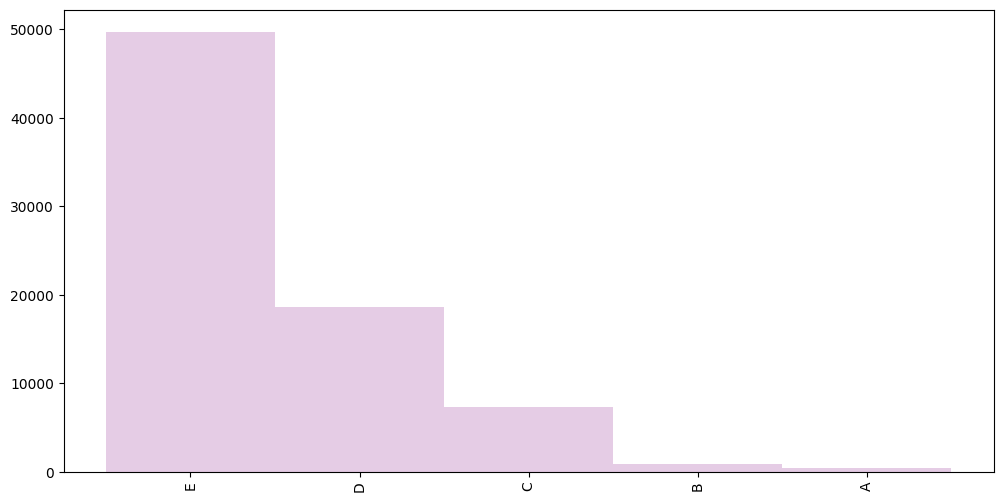

In [30]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width= 1, color = 'purple', alpha = 0.2, figsize=(12, 6))

> ### Conclusões

Existem mais pessoas na Classe E do que na A, B, C e D somadas.


### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<ipython-input-89-eb49d8fa5c50>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Idade'], color='darkviolet', hist_kws={'edgecolor': 'purple'}, kde_kws={'color': 'lime'})


<Axes: title={'center': 'Distribuição de Frequências - IDADE'}, xlabel='Anos', ylabel='Density'>

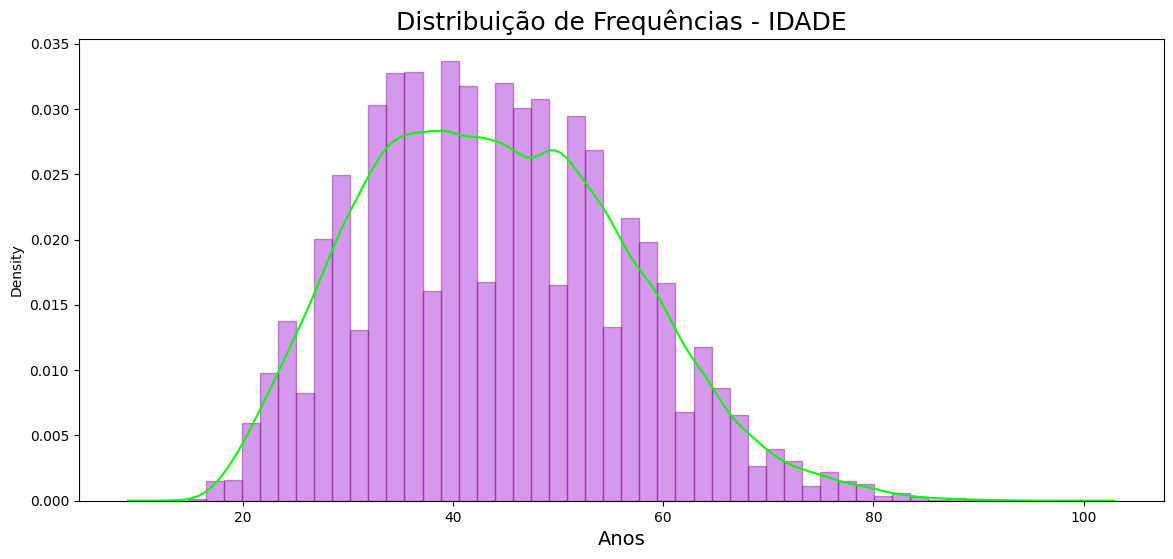

In [89]:
ax = sns.distplot(dados['Idade'], color='darkviolet', hist_kws={'edgecolor': 'purple'}, kde_kws={'color': 'lime'})
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências - IDADE', fontsize=18)
ax.set_xlabel("Anos", fontsize=14)
ax

<ipython-input-90-51918a3cf801>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Altura'], color='darkviolet', hist_kws={'edgecolor': 'purple'}, kde_kws={'color': 'lime'})


<Axes: title={'center': 'Distribuição de Frequências - Altura'}, xlabel='Anos', ylabel='Density'>

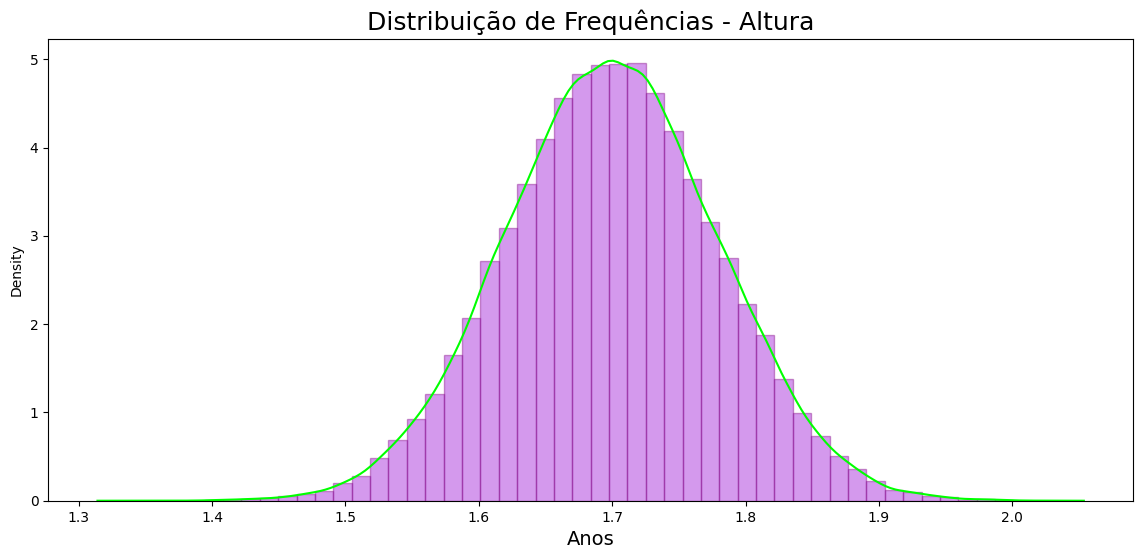

In [90]:
ax = sns.distplot(dados['Altura'], color='darkviolet', hist_kws={'edgecolor': 'purple'}, kde_kws={'color': 'lime'})
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel("Anos", fontsize=14)
ax

<ipython-input-91-666e92565ff6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Renda'], color='darkviolet', hist_kws={'edgecolor': 'purple'}, kde_kws={'color': 'lime'})


<Axes: title={'center': 'Distribuição de Frequências - RENDA'}, xlabel='Anos', ylabel='Density'>

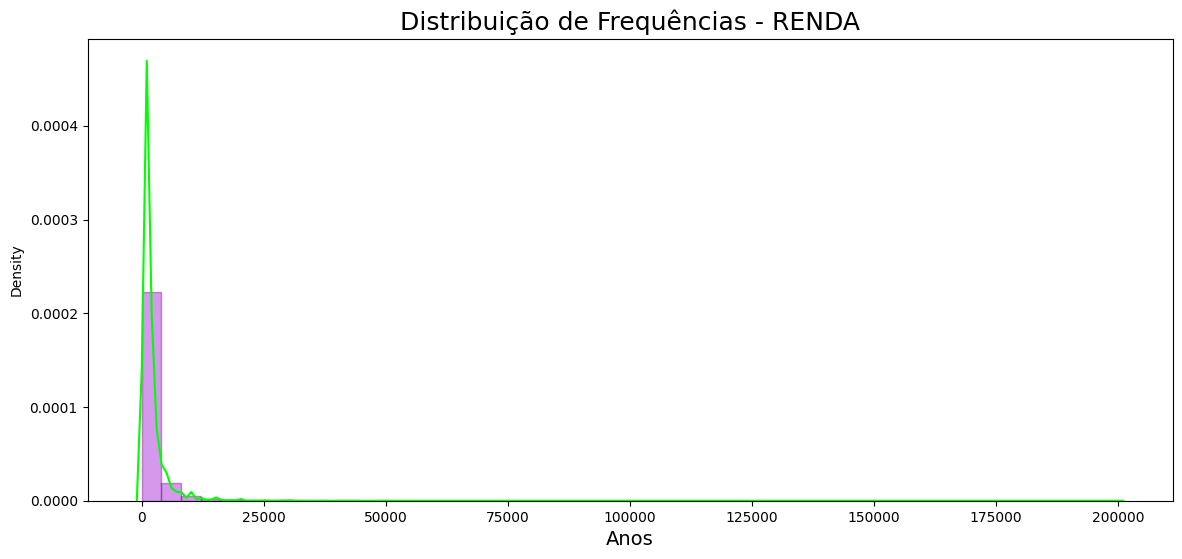

In [91]:
ax = sns.distplot(dados['Renda'], color='darkviolet', hist_kws={'edgecolor': 'purple'}, kde_kws={'color': 'lime'})
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências - RENDA', fontsize=18)
ax.set_xlabel("Anos", fontsize=14)
ax

> ### Conclusões

A mediana e a média das medidas é ~1.7m, justificando a simetria do gráfico. Existem poucas pessoas entrevistadas com 1.4-1.5m e 1.9-2m.

Há uma notável diferença de renda, onde poucos ganham mais que 15k.

A maioria dos entrevistados tem entre 35 e 45 anos.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<ipython-input-36-e8b05f5276d7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda < 20000').Renda)


<Axes: xlabel='Renda', ylabel='Density'>

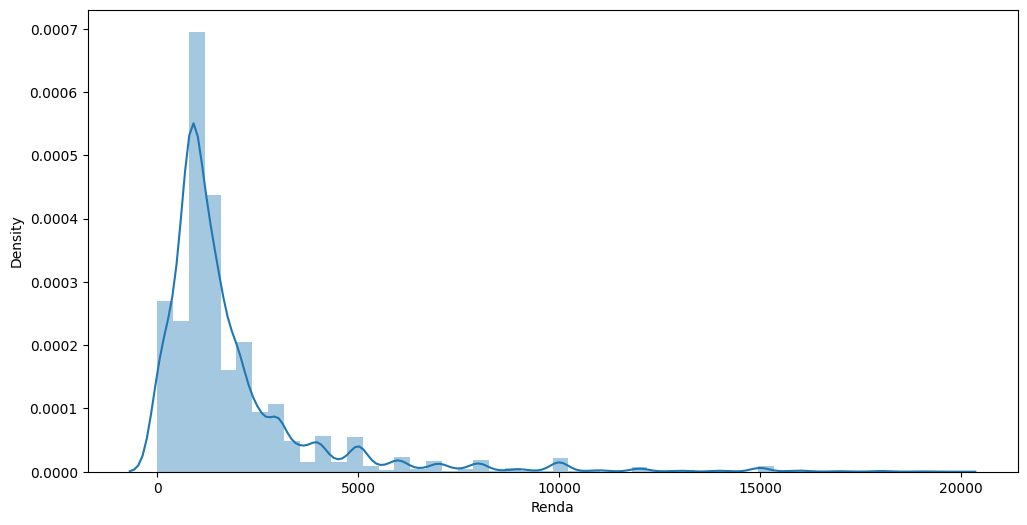

In [36]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [41]:
# Definindo os dicionários de mapeamento para SEXO e COR
sexo = {0: 'Masculino', 1: 'Feminino'}
cor = {0: 'Indígena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda', 9: 'Sem declaração'}

# Criando a tabela de frequências cruzando SEXO e COR
tabela_frequencias = pd.crosstab(dados['Sexo'].map(sexo), dados['Cor'].map(cor))

# Calculando os percentuais
tabela_percentuais = tabela_frequencias.div(tabela_frequencias.sum(axis=1), axis=0) * 100

# Adicionando a linha 'Total' à tabela de frequências
total_linha = tabela_frequencias.sum(axis=1)
tabela_frequencias['Total'] = total_linha

# Adicionando a coluna 'Total' à tabela de frequências
total_coluna = tabela_frequencias.sum(axis=0)
total_coluna['Total'] = sum(total_linha)
tabela_frequencias.loc['Total'] = total_coluna

# Mostrando a tabela de frequências e a tabela de percentuais
print("Tabela de Frequências:")
print(tabela_frequencias)
print("\nTabela de Percentuais:")
print(tabela_percentuais)

Tabela de Frequências:
Cor        Amarela  Branca  Indígena  Parda  Preta  Total
Sexo                                                     
Feminino       117    9621       101  10862   2889  23590
Masculino      235   22194       256  25063   5502  53250
Total          352   31815       357  35925   8391  76840

Tabela de Percentuais:
Cor         Amarela     Branca  Indígena      Parda      Preta
Sexo                                                          
Feminino   0.495973  40.784231  0.428148  46.044934  12.246715
Masculino  0.441315  41.678873  0.480751  47.066667  10.332394


> ### Conclusões

Foram entrevistadas mais pessoas da cor parda do Sexo Feminino e do Sexo Masculino.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [42]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [43]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [44]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [45]:
dados.Renda.mad()

<ipython-input-45-9b3374082fa9>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dados.Renda.mad()


1526.4951371638058

### Obtenha a variância

In [46]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [47]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [59]:
dados = pd.read_csv('dados.csv')

# Definindo os dicionários de mapeamento para SEXO e COR
sexo = {0: 'Masculino', 1: 'Feminino'}
cor = {0: 'Indígena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda', 9: 'Sem declaração'}

# Mapeando os valores de SEXO e COR
dados['Sexo'] = dados['Sexo'].map(sexo)
dados['Cor'] = dados['Cor'].map(cor)

# Calculando a média, mediana e valor máximo da variável Renda segundo Sexo e Cor
resultados = dados.groupby(['Sexo', 'Cor'])['Renda'].agg(['mean', 'median', 'max'])
resultados

mean  median     max
Sexo      Cor                                  
Feminino  Amarela   3027.341880  1500.0   20000
          Branca    2109.866750  1200.0  100000
          Indígena  2464.386139   788.0  120000
          Parda     1176.758516   800.0   30000
          Preta     1134.596400   800.0   23000
Masculino Amarela   4758.251064  2800.0   50000
          Branca    2925.744435  1700.0  200000
          Indígena  1081.710938   797.5   10000
          Parda     1659.577425  1200.0  100000
          Preta     1603.861687  1200.0   50000

> ### Conclusões

A maior renda média das pessoas entrevistadas foram de pessoas da cor Amarela, e a menor renda média foram de pessoas da cor preta, em ambos os sexos.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [64]:
medidas_dispersao = dados.groupby(['Sexo', 'Cor'])['Renda'].agg(['mad', 'std', 'var'])
medidas_dispersao

# mad -> Desvio médio absoluto / std -> Desvio Padrão / var -> Variância

<ipython-input-64-0e5332b97511>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  medidas_dispersao = dados.groupby(['Sexo', 'Cor'])['Renda'].agg(['mad', 'std', 'var'])
<ipython-input-64-0e5332b97511>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  medidas_dispersao = dados.groupby(['Sexo', 'Cor'])['Renda'].agg(['mad', 'std', 'var'])
<ipython-input-64-0e5332b97511>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  medidas_dispersao = dados.groupby(['Sexo', 'Cor'])['Renda'].agg(['mad', 'std', 'var'])
<ipython-input-64-0e5332b97511>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, y

mad           std           var
Sexo      Cor                                              
Feminino  Amarela   2549.146322   3731.173660  1.392166e+07
          Branca    1670.967106   3251.013154  1.056909e+07
          Indígena  3007.892952  11957.498292  1.429818e+08
          Parda      811.580946   1596.233048  2.547960e+06
          Preta      705.453357   1349.799809  1.821960e+06
Masculino Amarela   3709.597211   5740.824820  3.295707e+07
          Branca    2261.012346   4750.791872  2.257002e+07
          Indígena   798.910889   1204.093490  1.449841e+06
          Parda     1125.827704   2312.087184  5.345747e+06
          Preta      975.602482   1936.309271  3.749294e+06

> ### Conclusões

A cor Indígena e a cor Amarela no feminino e masculino respectivamente são as que mais divergem na média.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<ipython-input-95-009e8a9be297>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)


<Axes: title={'center': 'Boxplot da RENDA por SEXO e COR'}, xlabel='R$', ylabel='Cor'>

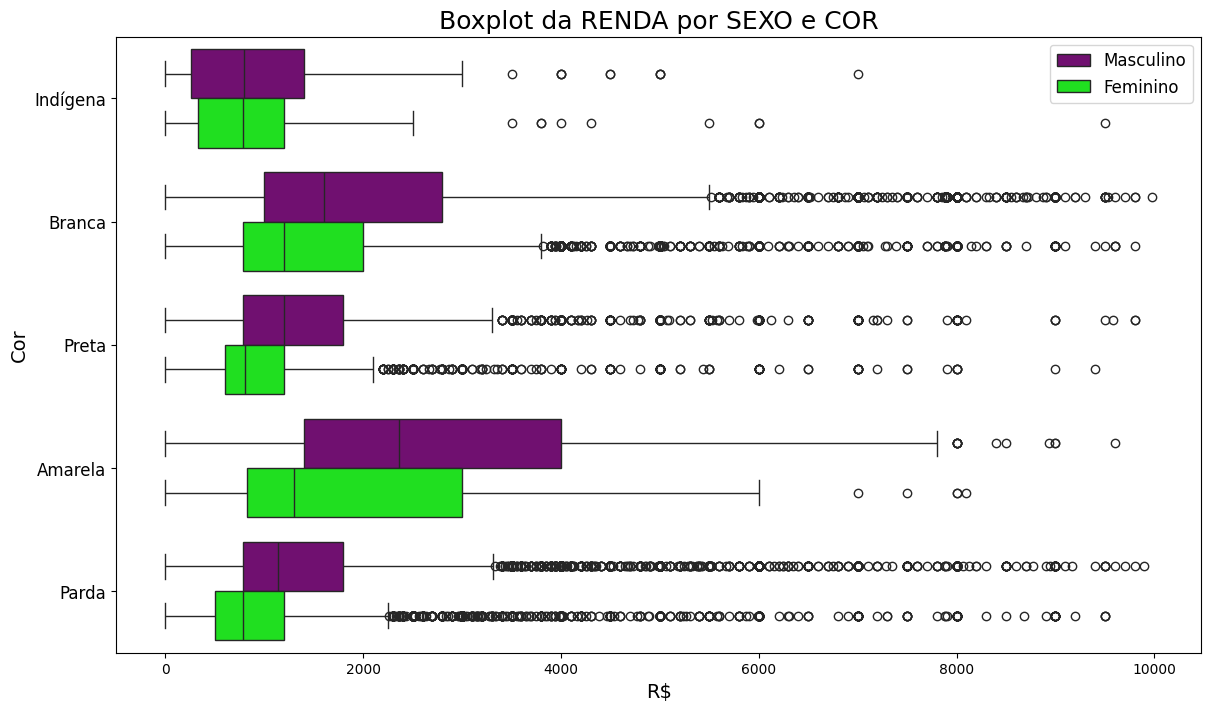

In [95]:
cores = ['purple', 'lime']
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data=dados.query("Renda < 10000"), orient='h', palette=cores)
ax.figure.set_size_inches(14,8) # Tamanho da figura
ax.set_title('Boxplot da RENDA por SEXO e COR', fontsize=18) # Título
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Cor', fontsize=14)
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)

# Legendas
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino','Feminino'], fontsize=12)
ax

> ### Conclusões

As pessoas entrevistadas da cor amarela são as que possuem a renda mais alta e as pretas e pardas, respectivamente, as mais baixas. Homens entrevistados ganham mais do que as mulheres entrevistadas.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [74]:
from scipy import stats
# Calculando o número de pessoas que ganham um salário mínimo ou menos
numero_pessoas_salario_minimo_ou_menos = dados[dados['Renda'] <= 788]['Renda'].count()

# Calculando o número total de pessoas no dataset
numero_total_pessoas = dados['Renda'].count()

# Calculando o percentual de pessoas que ganham um salário mínimo ou menos
percentual_salario_minimo_ou_menos = (numero_pessoas_salario_minimo_ou_menos / numero_total_pessoas) * 100

print(f'O percentual de pessoas que ganham um salário mínimo ou menos é: {percentual_salario_minimo_ou_menos:.2f}%')


O percentual de pessoas que ganham um salário mínimo ou menos é: 28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [75]:
# Calculando o valor máximo ganho por 99% das pessoas
valor_maximo_99_percentil = dados['Renda'].quantile(0.99)

print(f'O valor máximo ganho por 99% das pessoas é: R${valor_maximo_99_percentil:.2f}')

O valor máximo ganho por 99% das pessoas é: R$15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [100]:
# Calculando as estatísticas de renda por anos de estudo e sexo usando crosstab e aggfunc
tabela_renda_estudo_sexo = pd.crosstab(dados['Anos de Estudo'], dados['Sexo'],
                                        values=dados['Renda'], aggfunc=['mean', 'median', 'max', 'std'])

tabela_renda_estudo_sexo

mean                median                max  \
Sexo               Feminino    Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
1                516.201748   799.494638      390       700    10000   
2                492.771987   895.629047      400       788     2000   
3                529.911638   931.178986      450       788     4000   
4                546.853916  1109.203862      500       800     3500   
5                704.279111  1302.329283      788      1000    10000   
6                781.389776  1338.653218      788      1045     8000   
7                833.732824  1448.875419      788      1200     6000   
8                830.751004  1465.497940      788      1200     9000   
9                933.615351  1639.396667      800      1300    18000   
10               868.021700  1508.038850      788      1200    20000   
11               925.919225  1731.270847      800      1218     6000   
12              1286.790889  2117.060504     1000      1500   100000   
13              1682.313725  2470.330776     1200      1800   120000   
14              1911.730047  3195.099154     1300      2400    20000   
15              2226.460457  3706.620269     1600      2500    20000   
16              3899.513231  6134.279790     2800      4000   100000   
17               798.174419  1295.761905      788      1200     3000   

                                  std               
Sexo           Masculino     Feminino    Masculino  
Anos de Estudo                                      
1                  30000   639.311534  1023.904884  
2                  30000   425.291842  1331.950552  
3                  40000   498.234168  1435.173827  
4                  80000   424.124446  2143.800133  
5                  50000   629.553397  1419.821787  
6                  35000   635.782641  1484.650587  
7                  25000   574.547028  1476.628602  
8                  40000   602.038029  1419.708673  
9                  30000   896.781213  1515.583715  
10                 60000   973.221652  2137.664774  
11                 45000   620.611907  2078.609734  
12                200000  1819.040417  2676.538942  
13                 30000  4851.833513  2268.081538  
14                 25000  2053.789771  2797.116800  
15                 50000  2064.083336  3987.214974  
16                200000  4212.770709  7447.613594  
17                  7000   459.985964   979.648745

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Boxplot da RENDA por SEXO e COR'}, xlabel='R$', ylabel='Anos de estudo'>

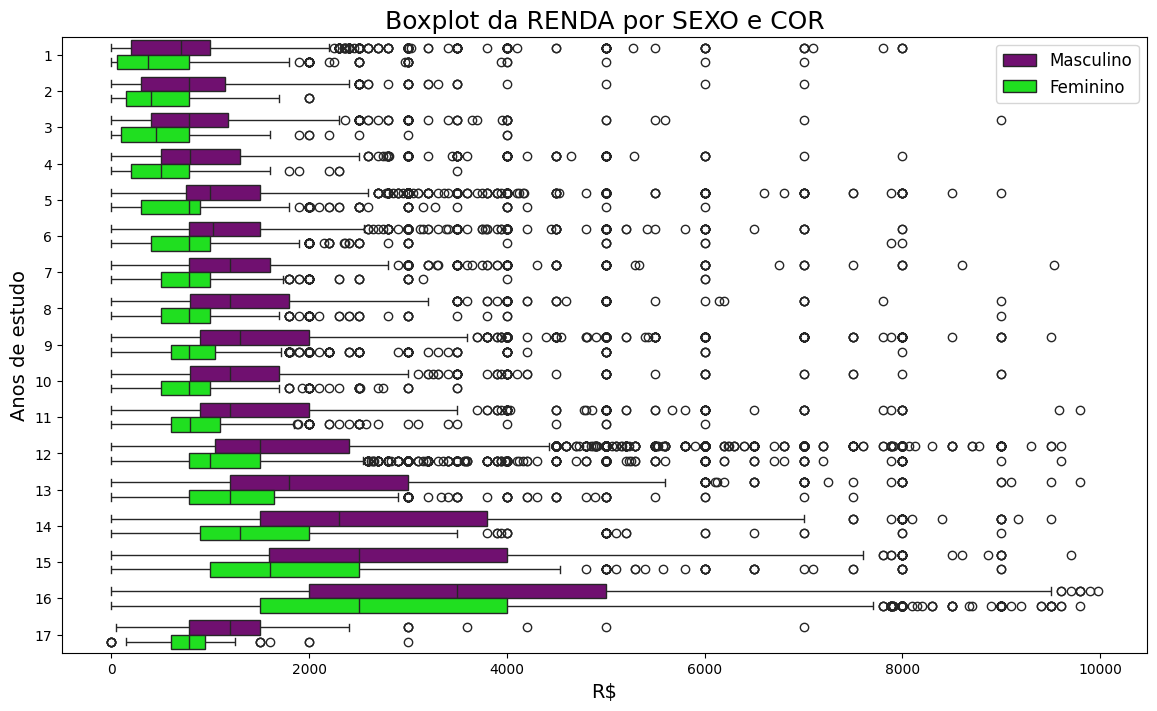

In [103]:
cores = ['purple', 'lime']
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data=dados.query("Renda < 10000"), orient='h', palette=cores)
ax.figure.set_size_inches(14,8) # Tamanho da figura
ax.set_title('Boxplot da RENDA por SEXO e COR', fontsize=18) # Título
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Anos de estudo', fontsize=14)

# Legendas
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino','Feminino'], fontsize=12)
ax

> ### Conclusões

Pessoas entrevistadas do sexo masculino possuem maior renda.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [108]:
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}
renda_por_uf = dados.groupby(['UF']).agg({'Renda': ['mean','median','max','std']})
renda_por_uf.rename(index=uf)

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

In [110]:
[key for key in uf.values()]

['Rondônia',
 'Acre',
 'Amazonas',
 'Roraima',
 'Pará',
 'Amapá',
 'Tocantins',
 'Maranhão',
 'Piauí',
 'Ceará',
 'Rio Grande do Norte',
 'Paraíba',
 'Pernambuco',
 'Alagoas',
 'Sergipe',
 'Bahia',
 'Minas Gerais',
 'Espírito Santo',
 'Rio de Janeiro',
 'São Paulo',
 'Paraná',
 'Santa Catarina',
 'Rio Grande do Sul',
 'Mato Grosso do Sul',
 'Mato Grosso',
 'Goiás',
 'Distrito Federal']

<ipython-input-112-097bcf44a2ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = 'Renda', y = 'UF', data=dados.query('Renda < 10000'), orient='h', palette=cores)
<ipython-input-112-097bcf44a2ab>:2: UserWarning: 
The palette list has fewer values (2) than needed (27) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x = 'Renda', y = 'UF', data=dados.query('Renda < 10000'), orient='h', palette=cores)
<ipython-input-112-097bcf44a2ab>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([key for key in uf.values()], fontsize=12)


<Axes: title={'center': 'Boxplot da RENDA por ESTADOS'}, xlabel='R$', ylabel='Estados'>

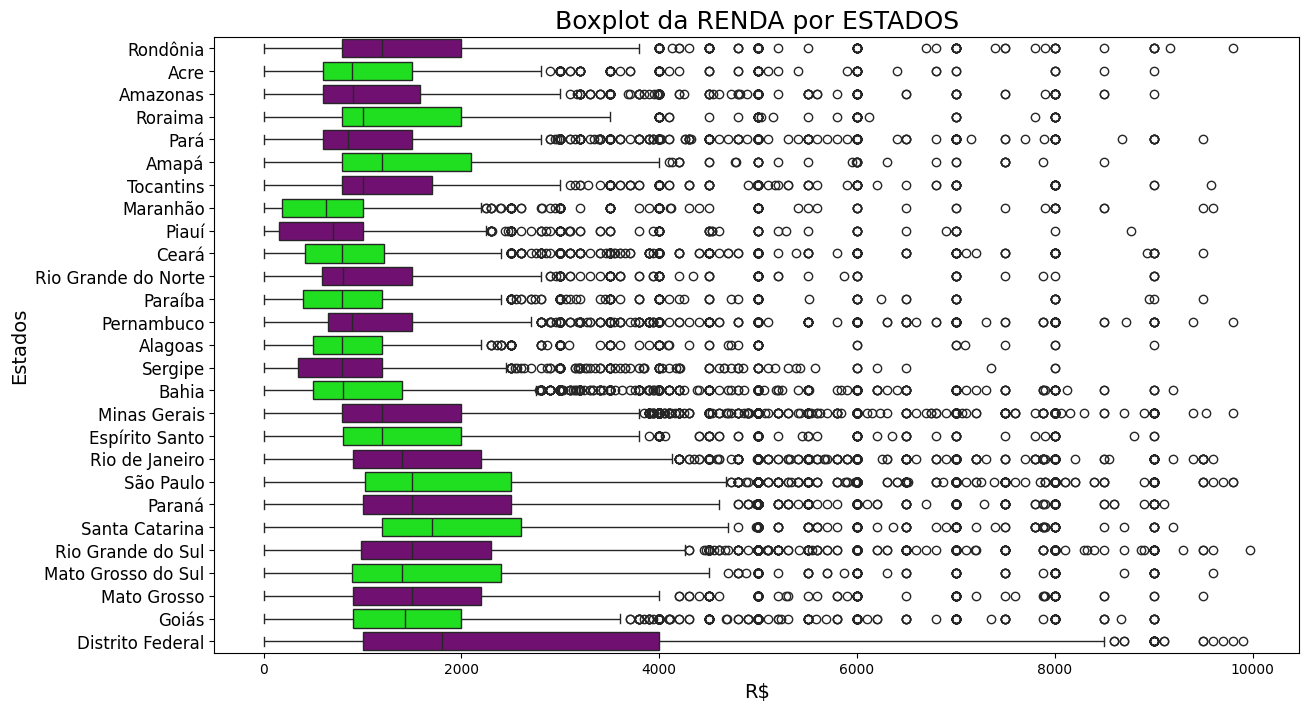

In [112]:
cores = ['purple', 'lime']
ax = sns.boxplot(x = 'Renda', y = 'UF', data=dados.query('Renda < 10000'), orient='h', palette=cores)
ax.figure.set_size_inches(14,8) # Tamanho da figura
ax.set_title('Boxplot da RENDA por ESTADOS', fontsize=18) # Título
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Estados', fontsize=14)
ax.set_yticklabels([key for key in uf.values()], fontsize=12)
ax

> ### Conclusões
O Distrito Federal é o que possui maior renda e Alagoas o menor, dentre os entrevistados.